## Import packages and dataset

In [198]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

In [199]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [200]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
data = pd.read_csv('oasis_cross-sectional.csv')
data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


## Data exploration and preprocessing

### Data cleaning

In [202]:
data.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [203]:
#Delete the ID column 

data = data.drop(columns=['ID'])
data

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...
431,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [204]:
# Check missing data 
data.isna().sum()

M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [205]:
# Drop the 'Delay' variable given that 95% of the data is missing
data = data.drop(columns = ['Delay'])
data

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...,...
431,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195
432,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042
433,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111
434,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390


In [206]:
# Drop all datapoints with null values
data1 = data.dropna()

In [207]:
data1.isna().sum()

M/F     0
Hand    0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

In [208]:
# Drop Handedness variable given that all data are 'R'-Right-handed and thus not informative
data1 = data1.drop(columns=['Hand'])
data1

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
411,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [209]:
# Double-check cleaned dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     216 non-null    object 
 1   Age     216 non-null    int64  
 2   Educ    216 non-null    float64
 3   SES     216 non-null    float64
 4   MMSE    216 non-null    float64
 5   CDR     216 non-null    float64
 6   eTIV    216 non-null    int64  
 7   nWBV    216 non-null    float64
 8   ASF     216 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 16.9+ KB


In [210]:
# Transform our Target variable into binary results (nondemented ==0 and all other values being demented)
data1['CDR']

0      0.0
1      0.0
2      0.5
8      0.0
9      0.0
      ... 
411    0.5
412    0.5
413    0.0
414    0.0
415    0.0
Name: CDR, Length: 216, dtype: float64

In [211]:
data1.loc[data1['CDR'] == 0, 'CDR'] = 0
data1.loc[data1['CDR'] != 0, 'CDR'] = 1

In [212]:
data1['CDR']

0      0.0
1      0.0
2      1.0
8      0.0
9      0.0
      ... 
411    1.0
412    1.0
413    0.0
414    0.0
415    0.0
Name: CDR, Length: 216, dtype: float64

In [220]:
# Transform features with string values into numeric values for calculating covariance matrix
data1['M/F'] = data1['M/F'].replace(['F','M'], [0,1])
data1

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0,73,4.0,3.0,27.0,1.0,1454,0.708,1.207
8,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
411,0,70,1.0,4.0,29.0,1.0,1295,0.748,1.355
412,0,73,3.0,2.0,23.0,1.0,1536,0.730,1.142
413,0,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,1,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


----
### Data analysis

In [221]:
X = data1.drop('CDR', axis=1)  # Features
y = data1['CDR']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (172, 8) (172,)
Test set shape: (44, 8) (44,)


In [222]:
# Calculate covariance matrix from training dataset for pca

X_train = StandardScaler().fit_transform(X_train)

In [223]:
# PCA analysis

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, data1[['CDR']]], axis = 1)

In [224]:
finalDf

,PC1,PC2,CDR
0,-1.874614,1.613698,0.0
1,1.736401,1.000079,0.0
2,-0.479995,-1.221007,1.0
3,-1.865039,2.591256,NaN
4,2.742506,-1.813851,NaN
...,...,...,...
411,NaN,NaN,1.0
412,NaN,NaN,1.0
413,NaN,NaN,0.0
414,NaN,NaN,0.0


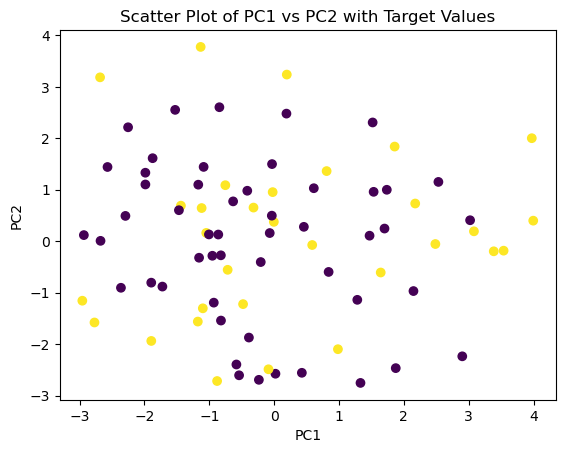

In [225]:
# Plot out pca results
scatter = plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['CDR'])
plt.title('Scatter Plot of PC1 vs PC2 with Target Values')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend(handles=scatter.legend_elements()[0], labels=finalDf['CDR'].unique())
plt.show()


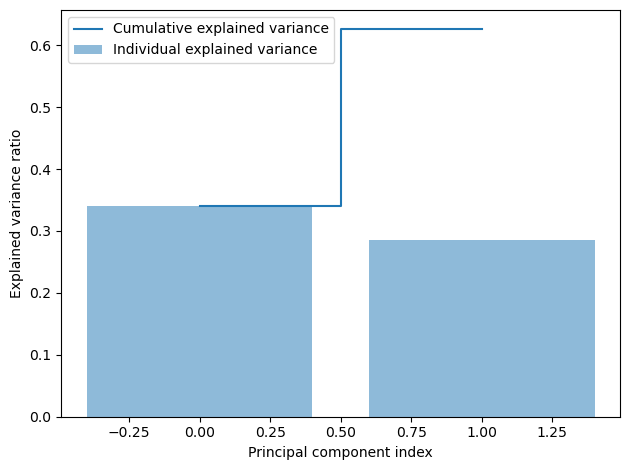

In [226]:
# Determine explained variance of each PC
exp_var_pca = pca.explained_variance_ratio_

# Visualize Cumulative sum of eigenvalues
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Inferring the PCA results

In [227]:
# Get eigenvectors to see which individual variables contribute the most to the principal components
eigenvectors = pca.components_
eigenvectors

array([[ 0.43829675, -0.03454681,  0.29904305, -0.30799529,  0.0638827 ,
         0.55369213, -0.10709964, -0.5479857 ],
       [ 0.09280395,  0.482203  , -0.34705162,  0.28885494, -0.47398471,
         0.12421983, -0.54564549, -0.1310138 ]])

In [228]:
# Match with the individual features
vars = list(data1.columns)
vars = np.array(vars)

vars = np.delete(vars,np.where(vars=='CDR'))
vars

array(['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'],
      dtype='<U4')

In [229]:
# Create result table of individual contributions
np.delete(vars,np.where(vars=='CDR'))
contributions = pd.DataFrame({'vars':vars, 'to_PC1':eigenvectors[0],'to_PC2':eigenvectors[1]})
contributions

,vars,to_PC1,to_PC2
0,M/F,0.438297,0.092804
1,Age,-0.034547,0.482203
2,Educ,0.299043,-0.347052
3,SES,-0.307995,0.288855
4,MMSE,0.063883,-0.473985
5,eTIV,0.553692,0.124220
6,nWBV,-0.107100,-0.545645
7,ASF,-0.547986,-0.131014
